In [1]:
# Import libraries
import pandas as pd
import numpy as np
!pip install xlrd
import matplotlib.pyplot as plt

In [125]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf63d8034a7a4cfe81617b85e5075c04 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KcVuZn3fIuI5zn00xQwcmM7529bECQtU1DE-j2OCaMs_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf63d8034a7a4cfe81617b85e5075c04.get_object(Bucket='exploringimmigrationtocanada-donotdelete-pr-csahyhqe32emja',Key='Canada.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body, 
                          sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_data_0.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [127]:
# Dataframe that shows number of immigrants to Canada between 1980-2013
canada_df = df_data_0

In [128]:
canada_df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [129]:
# Remove unnecessary columns
canada_df.drop(['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'], axis=1, inplace=True)
canada_df.head()

,OdName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


In [130]:
canada_df.rename(columns={'OdName':'Country'}, inplace=True)
canada_df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


In [131]:
# Add a Total column
canada_df['Total'] = canada_df.sum(axis=1)
canada_df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [132]:
# Let's look at number of immigrant from Haiti
canada_df[canada_df['Country'] == 'Haiti']

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
75,Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [133]:
haiti = canada_df[canada_df['Country'] == 'Haiti']
haiti.set_index('Country', inplace=True)
haiti

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [134]:
haiti_years = haiti.iloc[:,:-1].transpose()
haiti_years.head()

Country,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


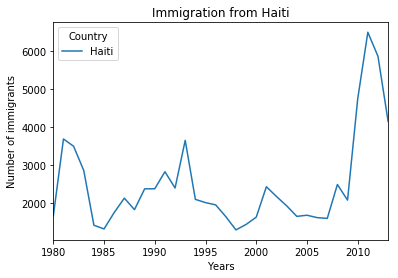

In [135]:
# Let's plot immigration trend from Haiti
haiti_years.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

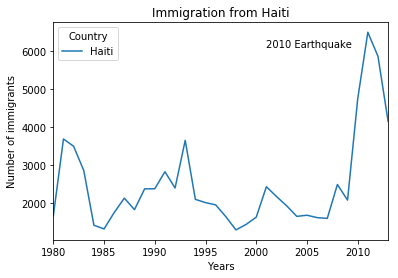

In [213]:
# What happened in 2010 for the spike we see in the plot? A simple Google search reveals that Haiti 
# was shook by a devastating earthquake in 2010. This explains the suddent spike in immigration numbers to
# Canada from Haiti. Let's annotate the spike in our plot.
haiti_years.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2001, 6100, '2010 Earthquake') # see note below
plt.show()

In [208]:
# Going back to the immigration dataframe, we can see which are the top 5 countries that contribute the most 
# number of immigrants to Canada
canada_df_sorted = canada_df.sort_values(by=['Total'], ascending=False, axis=0)
canada_df_sorted.reset_index(inplace=True, drop=True)
canada_top5_df = canada_df_sorted.head(5)
canada_top5_df

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,8880,8670,8147,7338,5704,4211,7150,10189,11522,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,5123,6682,3308,1863,1527,1816,1960,2643,2758,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,22045,24796,20620,10015,10170,9564,9470,21337,27359,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,978,972,1201,900,668,514,691,1072,1334,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [209]:
# Create a dataframe with the top 5 countries. Use transpose so that X axis can be years and 
# Y axis can be number of immigrants for each country
canada_top5_df.set_index(['Country'], inplace=True)
canada_top5_df
canada_top5_df.index.name = None
canada_top5_df = canada_top5_df.iloc[:,0:-1].transpose()
canada_top5_df.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

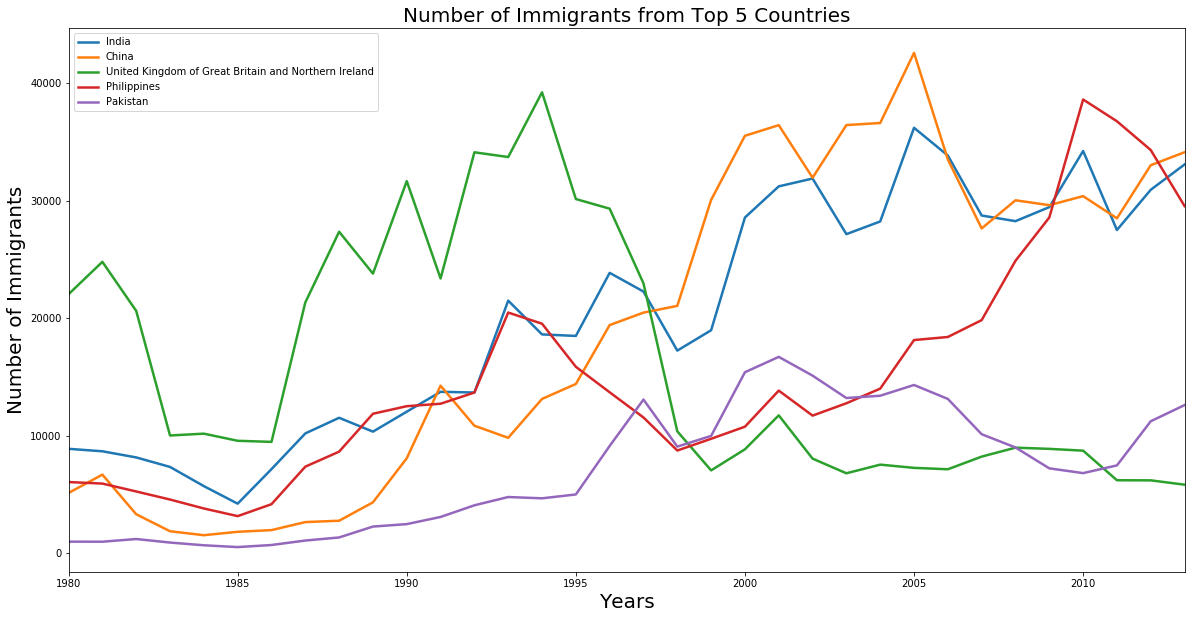

In [228]:
# Plot immigration trends from top 5 countries
canada_top5_df.plot(figsize=(20, 10), kind='line', linewidth=2.5)
plt.title('Number of Immigrants from Top 5 Countries', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=20)
plt.xlabel('Years', fontsize=20)
#plt.show()